# Clustering Russian regions by socio-economic development

### Summary

The Russian Federation consists of __85 subjects__ of the federation (regions). Regions for historical and territorial reasons are combined into larger federal districts (macroregions). Due to the same reasons, the development of macroregions both happened and happens unevenly.

With the help of clustering, an analysis was carried out, the goal of which was to divide the regions of Russia into groups with similar socio-economic situation.

If at the beginning of the study a political map of the Russian Federation is presented, where one color corresponds to one federal district, then at the end of the analysis a map is presented, where one color corresponds to one group of regions with similar socio-economic position

### Data set

Since there are a lot of socio-economic indicators, it was decided to divide them into 17 groups (population, labor, education, etc.)

Each excel sheet represents 1 group of indicators for 83 regions of Russia (with Republic of Crimea and Sevastopol)  
*_Moscow and St. Petersburg were excluded from the sample as obvious emissions_

It is worth noting that the data in the sources initially had mostly absolute values. To improve the quality of analysis, indicators were converted to relative

source: [Russian Federal State Statistics Service](http://www.gks.ru/bgd/regl/b18_14p/Main.htm)

### Purpose

___To divide the subjects of Russia into groups on socio-economic development using clustering___

### Tools

* Method for determining the number of clusters - __Elbow__
* Clustering method - __k-means__
* Visualization method - __TSNE__

### Russia map by federal districts

![Russia by federal districts](https://raw.githubusercontent.com/art-petrosov/Clustering_Russian_Regions/master/Russia_by_federal_districts.png)

### Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
#from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.manifold import TSNE
from jupyterthemes import jtplot

%matplotlib inline
%config InlineBackend.figure_format='retina'
jtplot.style(theme='chesterish')

In [2]:
file = 'Russian_Regions_Data.xlsx'
xl = pd.ExcelFile(file)

print(xl.sheet_names)

['Population', 'Labor', 'Education', 'Healthcare', 'GRP', 'GRP by activity', 'Organizations', 'Inform & communic technology', 'Connection', 'Income', 'Science and Innovations', 'Investments', 'Fixed Assets', 'Trading', 'Finance', 'Balance', 'Combined']


In [3]:
# Create variables and bind to each small dataset of Excel sheet

df_population = xl.parse(xl.sheet_names[0])
df_labor = xl.parse(xl.sheet_names[1])
df_education = xl.parse(xl.sheet_names[2])
df_healthcare = xl.parse(xl.sheet_names[3])
df_grp = xl.parse(xl.sheet_names[4])
df_grp_by_types = xl.parse(xl.sheet_names[5])
df_organizations = xl.parse(xl.sheet_names[6])
df_ict = xl.parse(xl.sheet_names[7])
df_connection = xl.parse(xl.sheet_names[8])
df_incomes = xl.parse(xl.sheet_names[9])
df_science_and_innovations = xl.parse(xl.sheet_names[10])
df_investment = xl.parse(xl.sheet_names[11])
df_fixed_essets = xl.parse(xl.sheet_names[12])
df_trade = xl.parse(xl.sheet_names[13])
df_finance = xl.parse(xl.sheet_names[14])
df_balance = xl.parse(xl.sheet_names[15])
df_combined = xl.parse(xl.sheet_names[16])

df_list = [df_population, df_labor, df_education, df_healthcare, df_grp, df_grp_by_types, df_organizations,
           df_ict, df_connection, df_incomes, df_science_and_innovations, df_investment, df_fixed_essets,
           df_trade, df_finance, df_balance, df_combined]

df_population.head()

,Region,Population density (people per sq km),Population growth (% of the population of the previous year),Urban population (in% of the total population of the region),Demographic load coefficient (the ratio of the number of people in working age to the number of people in working age),"Mortality at working age (number of deaths per 100,000 people in the respective age)",The rate of natural population growth (per 1000 population),"Migration rate of population growth (per 10,000 population)",Population younger than working age (% of total population),Working age population (% of total population),Population older than working age (% of total population)
0,Belgorod region,57.302583,0.2,67.3,780,451.6,-2.8,46,16.6,56.2,27.2
1,Bryansk region,34.971347,-0.4,70.1,794,606.6,-4.7,4,16.9,55.8,27.3
2,Vladimir region,47.752577,-0.5,78.1,828,634.4,-5.3,-2,16.4,54.7,28.9
3,Voronezh region,44.739464,0.1,67.3,783,537.2,-4.5,54,15.4,56.1,28.5
4,Ivanovo region,47.813084,-0.6,81.4,812,593.0,-5.2,-13,16.3,55.2,28.5


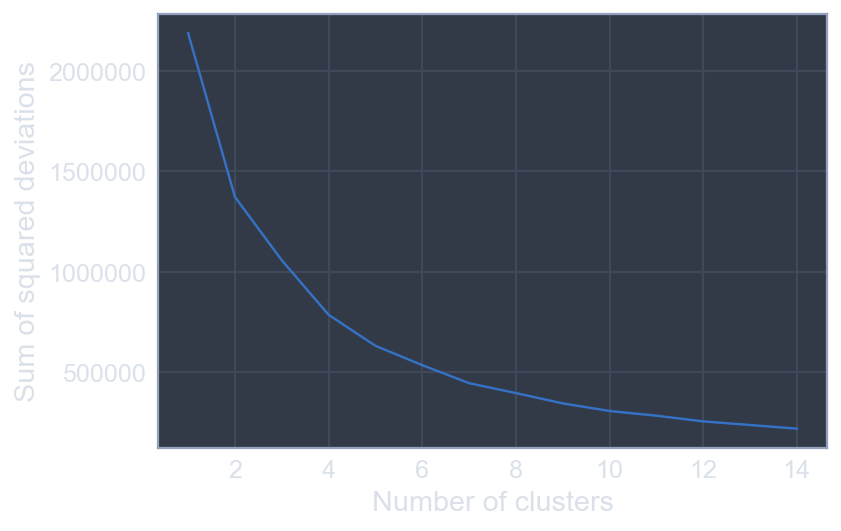

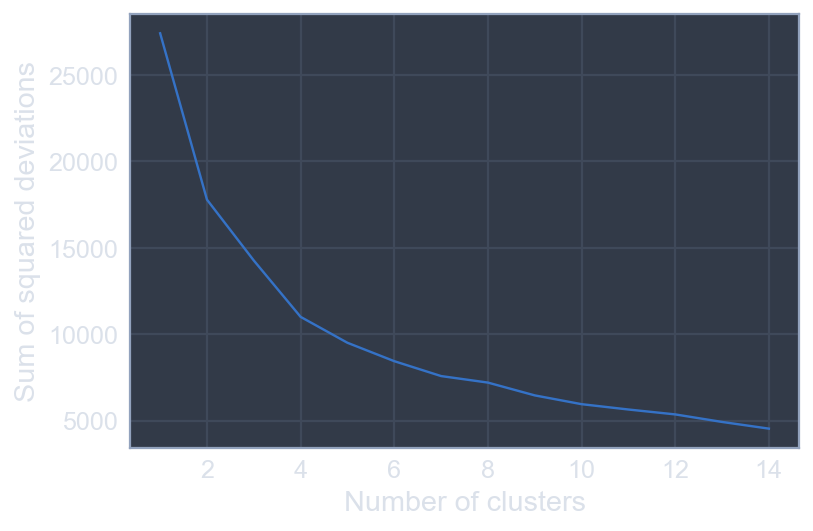

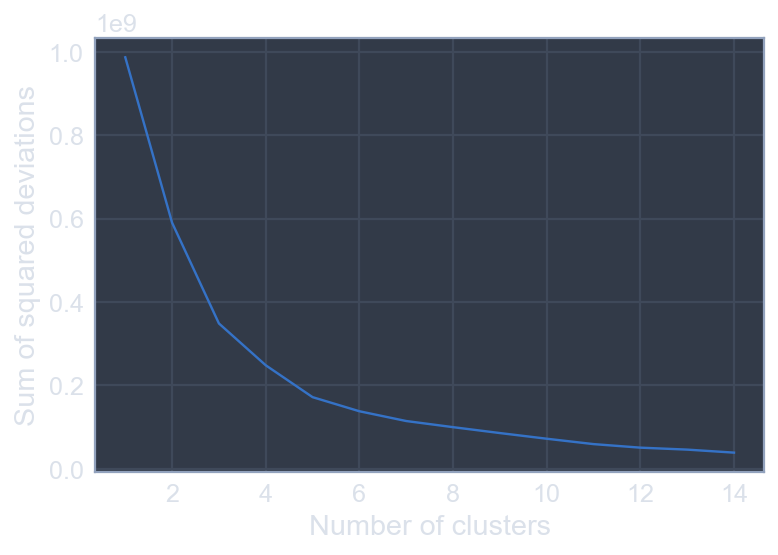

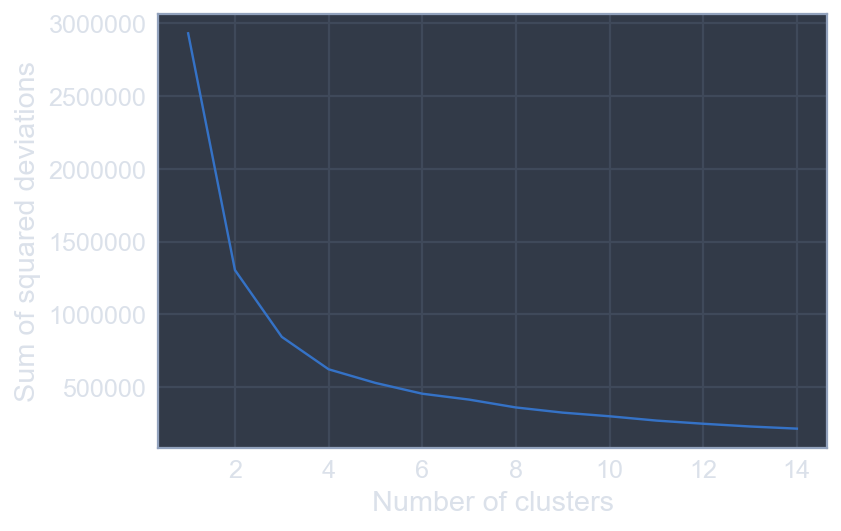

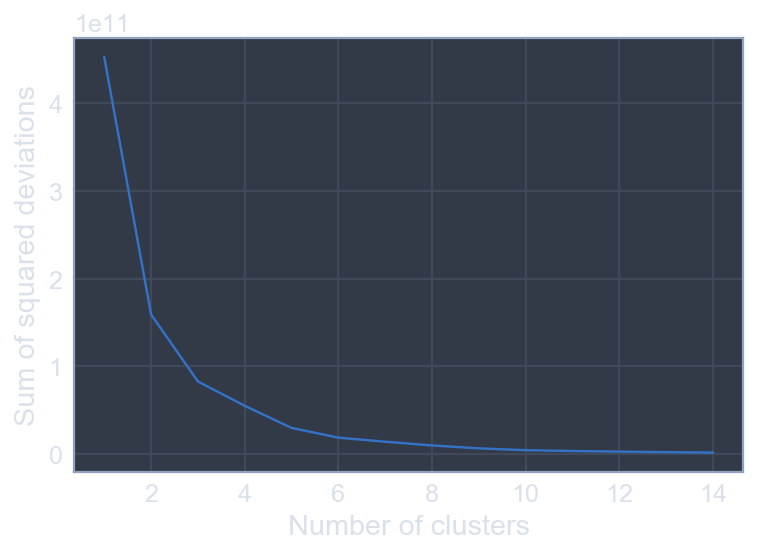

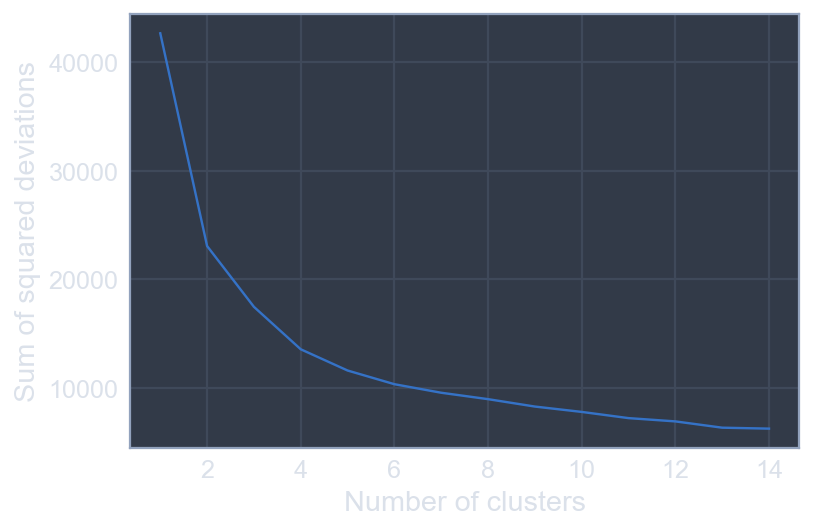

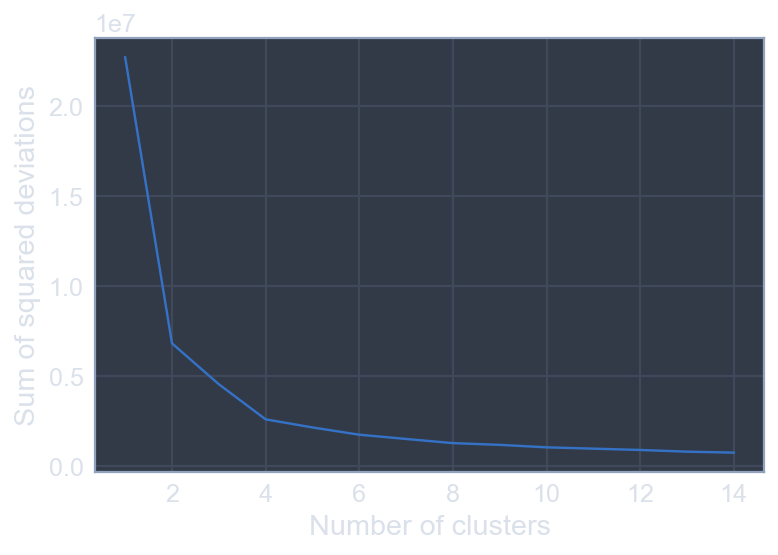

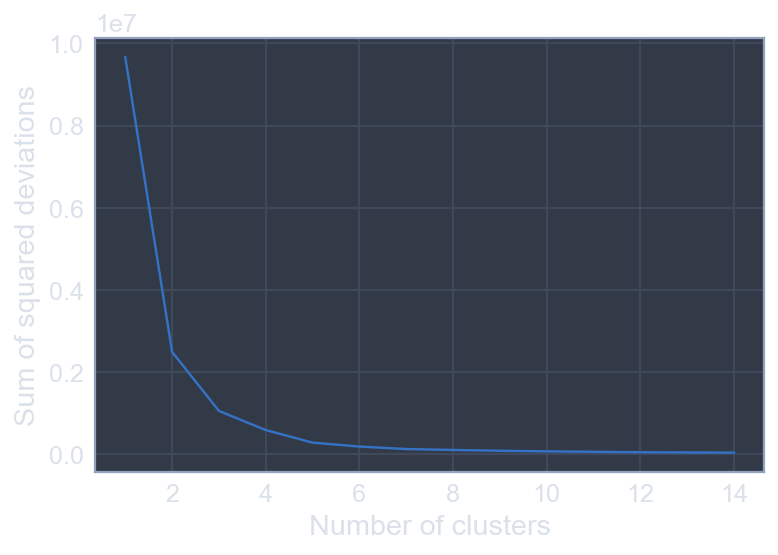

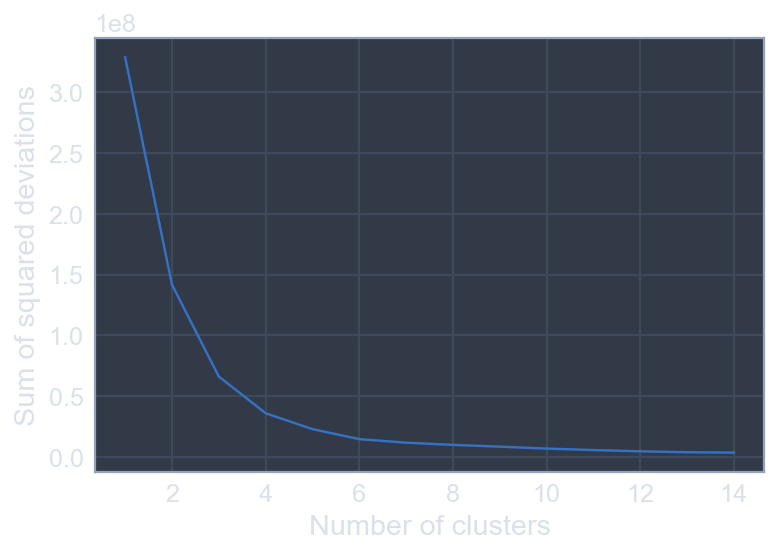

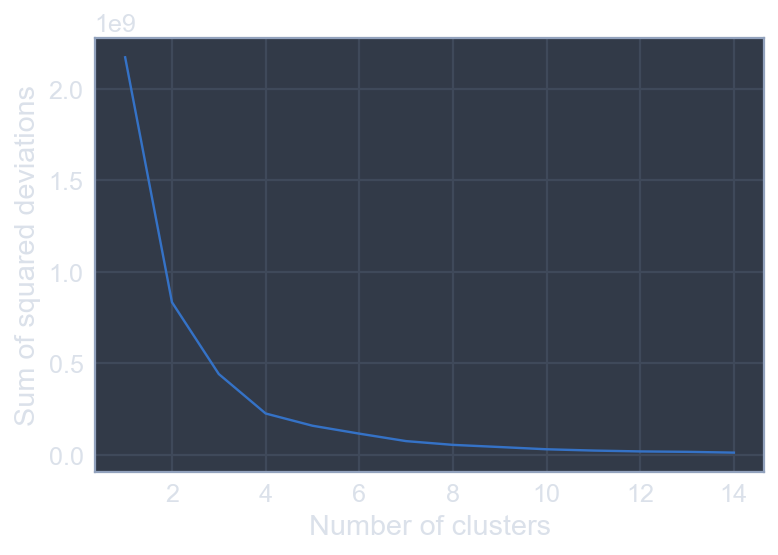

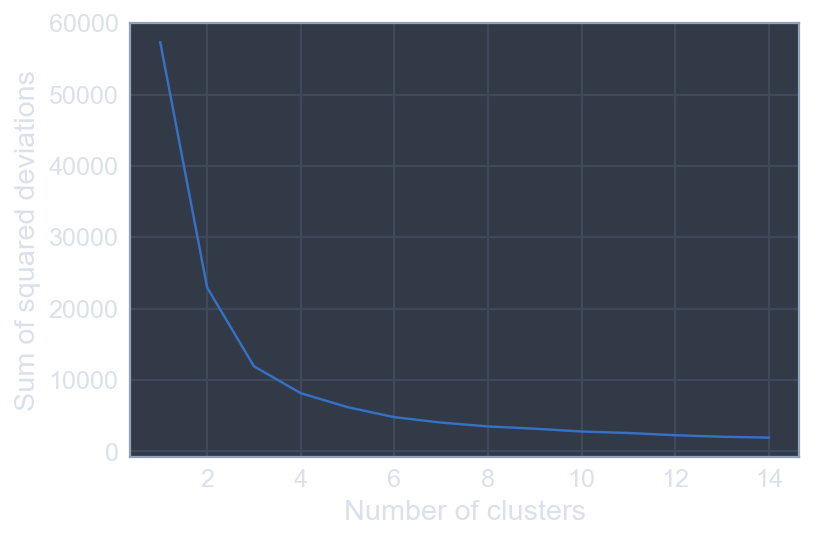

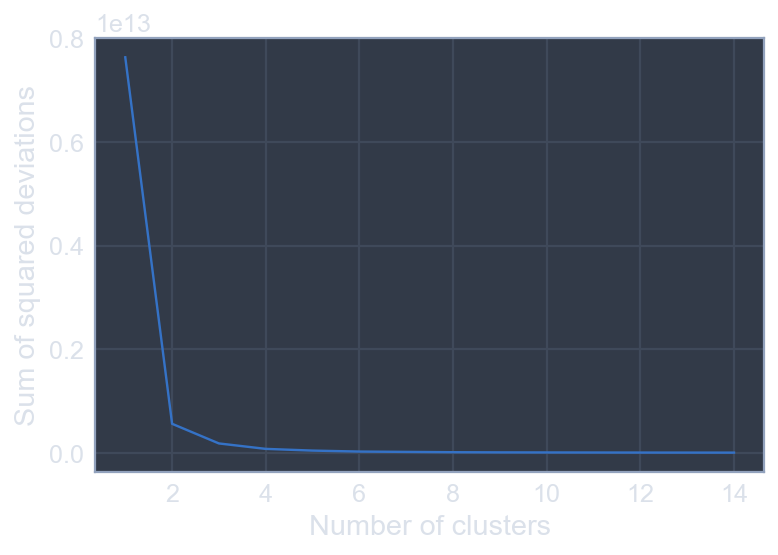

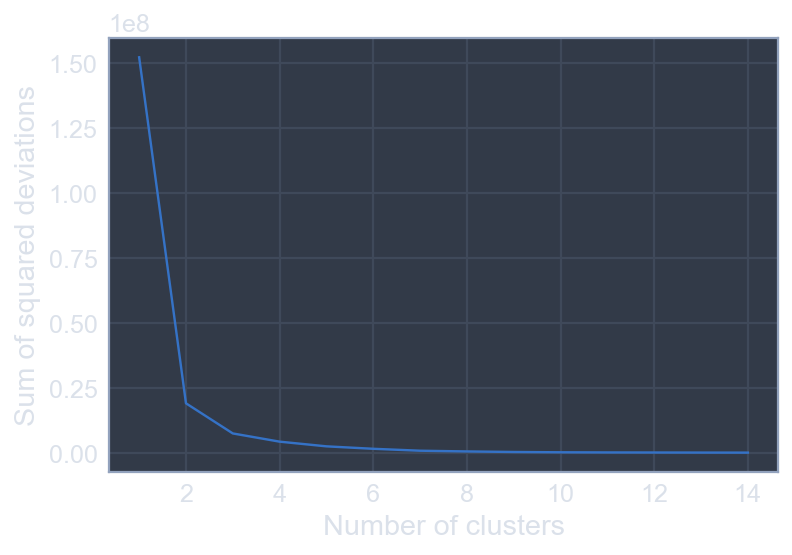

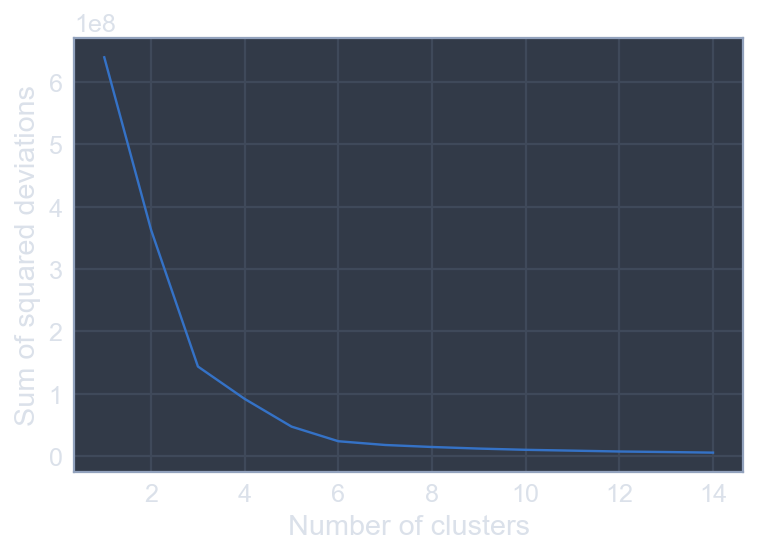

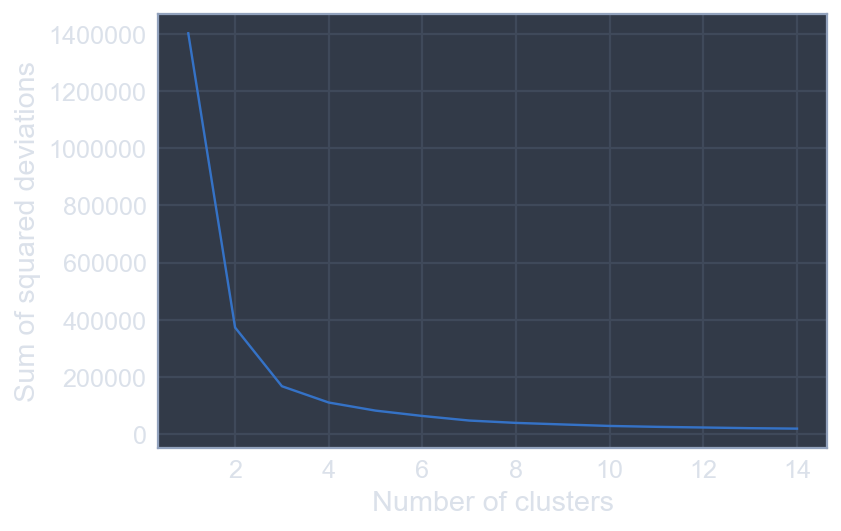

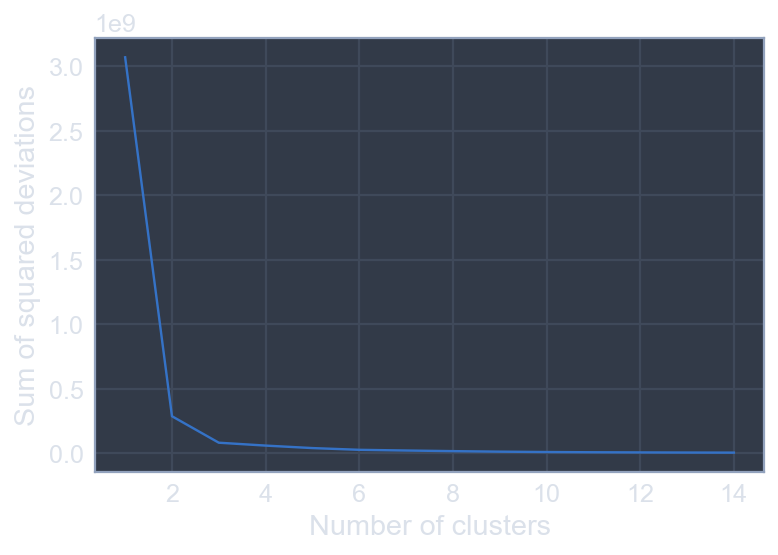

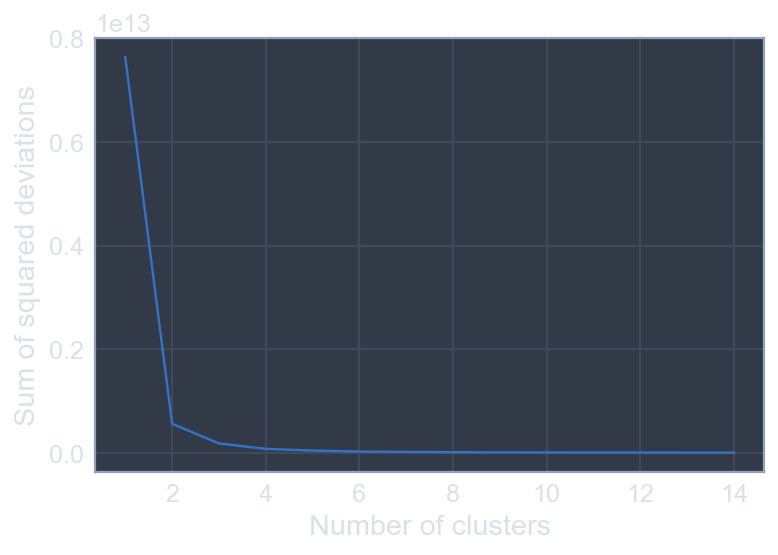

In [4]:
# Let's create a cycle that will calculate the optimal number of clusters for each dataset (Elbow method)

for i in range(len(xl.sheet_names)):  
    sse = {}
    
    for k in range(1, 15):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_list[i].iloc[:, 1:])
        df_population["clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of clusters")
    plt.ylabel("Sum of squared deviations")

In [5]:
# Create a function that will visualize the result of clustering in 2-dimensional space and save the graph (TSNE)

def TSNE_visualise(embedding_df, labels, tsne):
    x=[]
    y=[]
    image_name = df_list
    for i in range(0,embedding_df.shape[0]):
        x.append(embedding_df[i][0])
        y.append(embedding_df[i][1])
        
    colors = {0:'b', 1:'g', 2:'r', 3:'c', 4:'m', 5:'y', 6:'k'}
    colors_scheme = []
    for i in labels:
        colors_scheme.append(colors.get(i))
        
    for xaxis, yaxis, color in zip(x,y,colors_scheme):
        plt.scatter(x=xaxis, y=yaxis, c=color)
    image_name = ' %r perplexity & %s clusters.png' %(tsne.perplexity,len(set(list(labels))))
    print(image_name)
    plt.savefig(image_name)

### Population

In [6]:
# Implementation of clustering on a group of indicators by population (k-means method, 3 clusters)

kmeans_population = KMeans(n_clusters=3).fit(df_population.iloc[:, 1:])
series=pd.Series(kmeans_population.labels_)
series.value_counts()

2    47
1    26
0    10
dtype: int64

 5 perplexity & 3 clusters.png


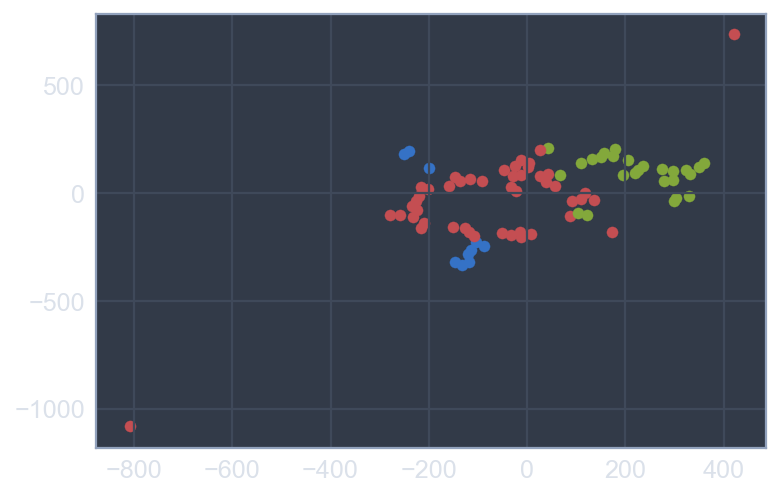

In [7]:
# Implementation of visualization on a group of indicators by population (TSNE method)

tsne = TSNE(perplexity=5)
embedding_pop = tsne.fit_transform(df_population.iloc[:, 1:])
TSNE_visualise(embedding_pop, kmeans_population.labels_,tsne)

### Labor

In [8]:
kmeans_labor = KMeans(n_clusters=3).fit(df_labor.iloc[:, 1:])
series=pd.Series(kmeans_labor.labels_)
series.value_counts()

0    43
2    33
1     7
dtype: int64

 5 perplexity & 3 clusters.png


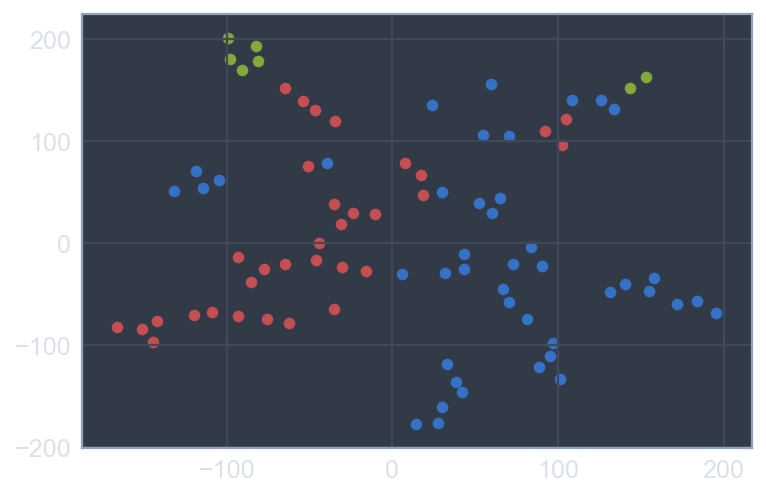

In [9]:
tsne = TSNE(perplexity=5)
embedding_lab = tsne.fit_transform(df_labor.iloc[:, 1:])
TSNE_visualise(embedding_lab, kmeans_labor.labels_,tsne)

### Education

In [10]:
kmeans_education = KMeans(n_clusters=4).fit(df_education.iloc[:, 1:])
series=pd.Series(kmeans_education.labels_)
series.value_counts()

0    36
3    26
1    17
2     4
dtype: int64

 5 perplexity & 4 clusters.png


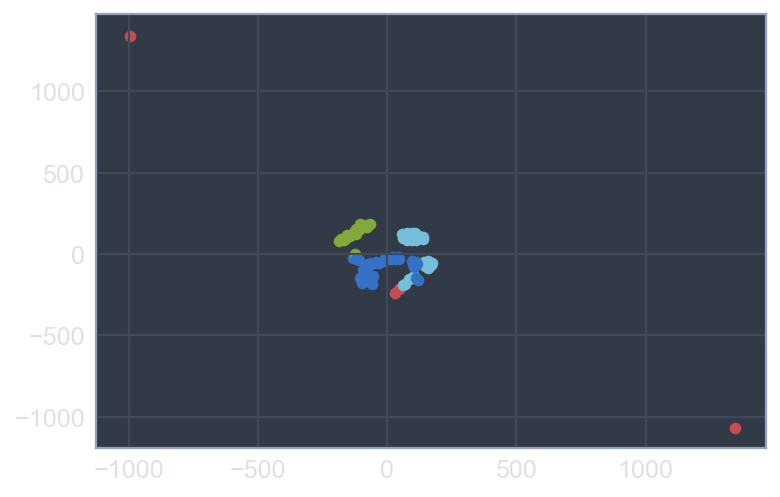

In [11]:
tsne = TSNE(perplexity=5)
embedding_education = tsne.fit_transform(df_education.iloc[:, 1:])
TSNE_visualise(embedding_education, kmeans_education.labels_,tsne)

### Healthcare

In [12]:
kmeans_healthcare = KMeans(n_clusters=6).fit(df_healthcare.iloc[:, 1:])
series=pd.Series(kmeans_healthcare.labels_)
series.value_counts()

2    26
0    26
4    15
3     8
1     6
5     2
dtype: int64

 5 perplexity & 6 clusters.png


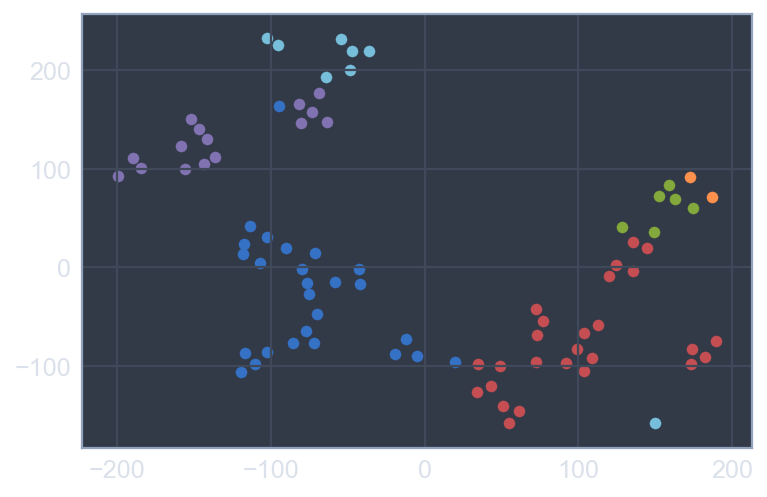

In [13]:
tsne = TSNE(perplexity=5)
embedding_healthcare = tsne.fit_transform(df_healthcare.iloc[:, 1:])
TSNE_visualise(embedding_healthcare, kmeans_healthcare.labels_,tsne)

### GRP

In [14]:
kmeans_grp = KMeans(n_clusters=4).fit(df_grp.iloc[:, 1:])
series=pd.Series(kmeans_grp.labels_)
series.value_counts()

3    42
0    22
1    13
2     6
dtype: int64

 5 perplexity & 4 clusters.png


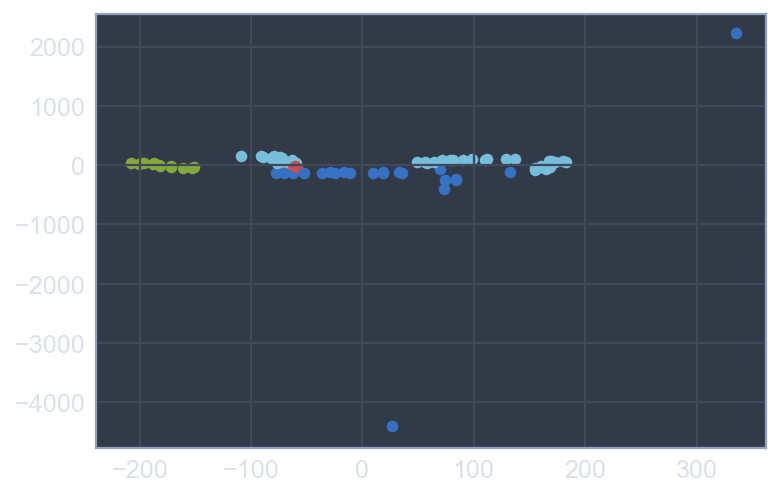

In [15]:
tsne = TSNE(perplexity=5)
embedding_grp = tsne.fit_transform(df_grp.iloc[:, 1:])
TSNE_visualise(embedding_grp, kmeans_grp.labels_,tsne)

### GRP by types

In [16]:
kmeans_grp_by_types = KMeans(n_clusters=5).fit(df_grp_by_types.iloc[:, 1:])
series=pd.Series(kmeans_grp_by_types.labels_)
series.value_counts()

4    26
0    26
1    13
2    12
3     6
dtype: int64

 5 perplexity & 5 clusters.png


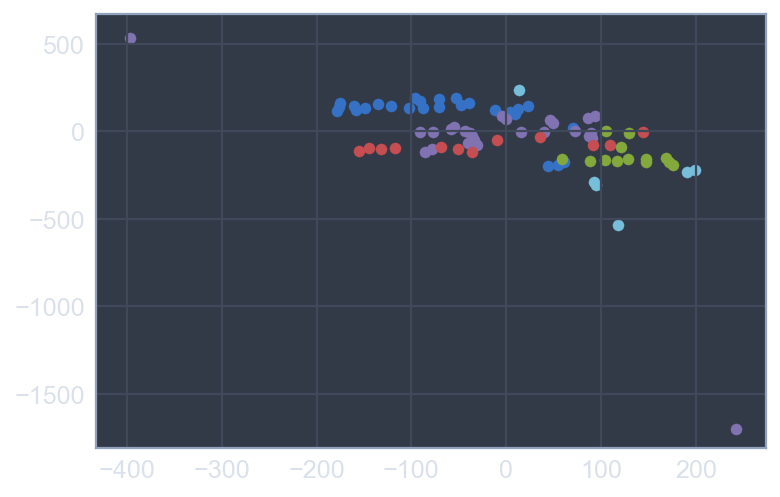

In [17]:
tsne = TSNE(perplexity=5)
embedding_grp_by_types = tsne.fit_transform(df_grp_by_types.iloc[:, 1:])
TSNE_visualise(embedding_grp_by_types, kmeans_grp_by_types.labels_,tsne)

### Organizations

In [18]:
kmeans_organizations = KMeans(n_clusters=3).fit(df_organizations.iloc[:, 1:])
series=pd.Series(kmeans_organizations.labels_)
series.value_counts()

2    40
0    29
1    14
dtype: int64

 5 perplexity & 3 clusters.png


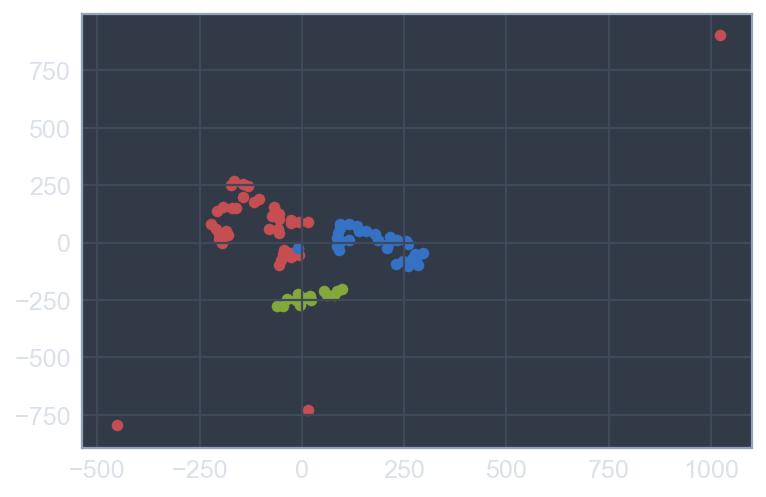

In [19]:
tsne = TSNE(perplexity=5)
embedding_organizations = tsne.fit_transform(df_organizations.iloc[:, 1:])
TSNE_visualise(embedding_organizations, kmeans_organizations.labels_,tsne)

### Information and communication technology

In [20]:
kmeans_ict = KMeans(n_clusters=3).fit(df_ict.iloc[:, 1:])
series=pd.Series(kmeans_ict.labels_)
series.value_counts()

0    77
2     4
1     2
dtype: int64

 5 perplexity & 3 clusters.png


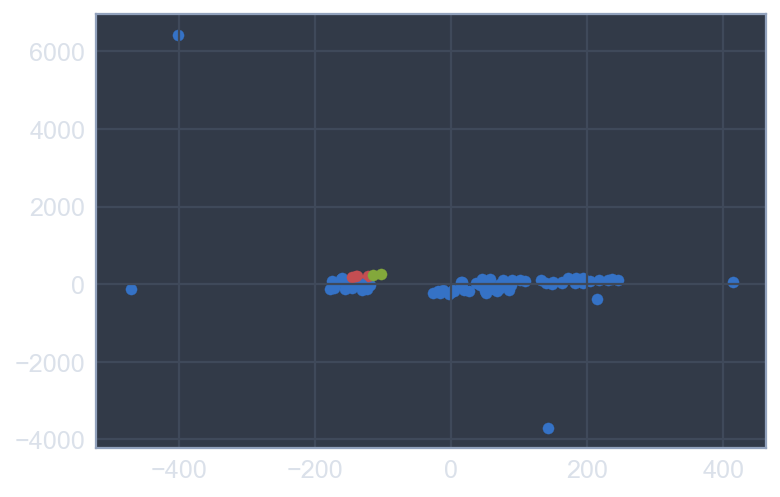

In [21]:
tsne = TSNE(perplexity=5)
embedding_ict = tsne.fit_transform(df_ict.iloc[:, 1:])
TSNE_visualise(embedding_ict, kmeans_ict.labels_,tsne)

### Connection

In [22]:
kmeans_connection = KMeans(n_clusters=7).fit(df_connection.iloc[:, 1:])
series=pd.Series(kmeans_connection.labels_)
series.value_counts()

5    32
2    16
0    11
4     7
6     6
3     6
1     5
dtype: int64

 5 perplexity & 7 clusters.png


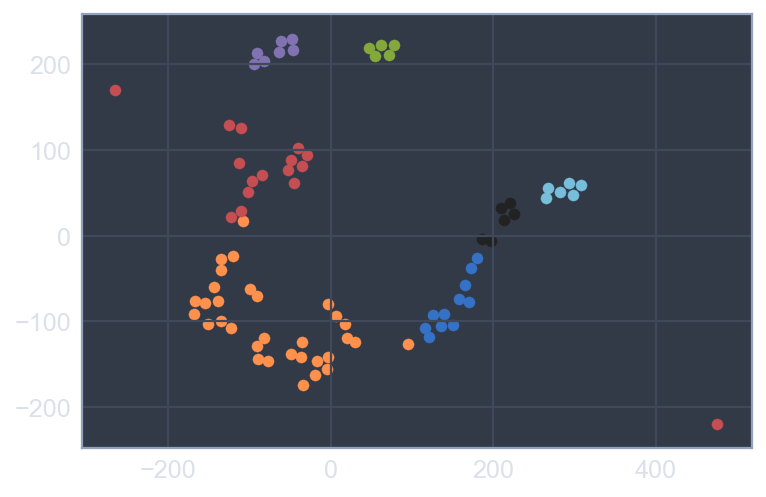

In [23]:
tsne = TSNE(perplexity=5)
embedding_connection = tsne.fit_transform(df_connection.iloc[:, 1:])
TSNE_visualise(embedding_connection, kmeans_connection.labels_,tsne)

### Science and innovations

In [24]:
kmeans_science_and_innovations = KMeans(n_clusters=5).fit(df_science_and_innovations.iloc[:, 1:])
series=pd.Series(kmeans_science_and_innovations.labels_)
series.value_counts()

4    40
0    19
2    14
3     5
1     5
dtype: int64

 5 perplexity & 5 clusters.png


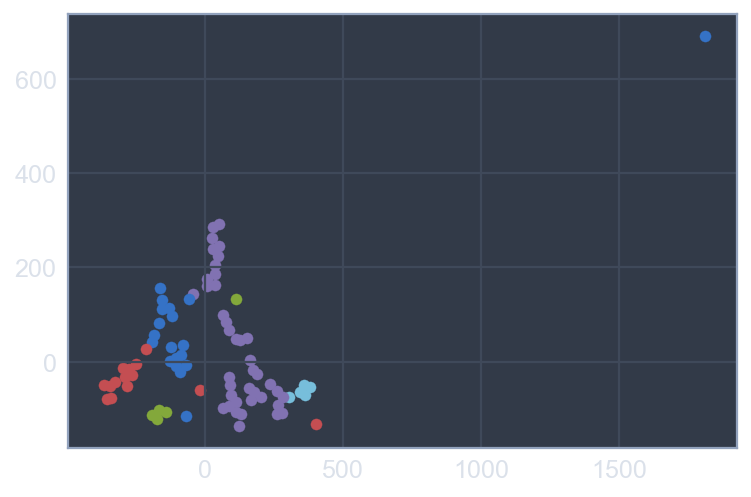

In [25]:
tsne = TSNE(perplexity=5)
embedding_science_and_innovations = tsne.fit_transform(df_science_and_innovations.iloc[:, 1:])
TSNE_visualise(embedding_science_and_innovations, kmeans_science_and_innovations.labels_,tsne)

### Incomes

In [26]:
kmeans_incomes = KMeans(n_clusters=4).fit(df_incomes.iloc[:, 1:])
series=pd.Series(kmeans_incomes.labels_)
series.value_counts()

2    35
3    29
1    13
0     6
dtype: int64

 5 perplexity & 4 clusters.png


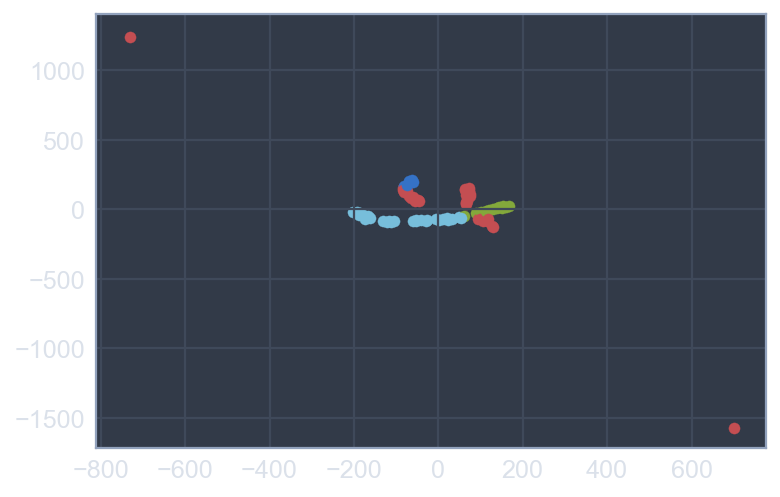

In [27]:
tsne = TSNE(perplexity=5)
embedding_incomes = tsne.fit_transform(df_incomes.iloc[:, 1:])
TSNE_visualise(embedding_incomes, kmeans_incomes.labels_,tsne)

### Investment

In [28]:
kmeans_investment = KMeans(n_clusters=6).fit(df_investment.iloc[:, 1:])
series=pd.Series(kmeans_investment.labels_)
series.value_counts()

0    39
4    29
5     8
2     3
3     2
1     2
dtype: int64

 5 perplexity & 6 clusters.png


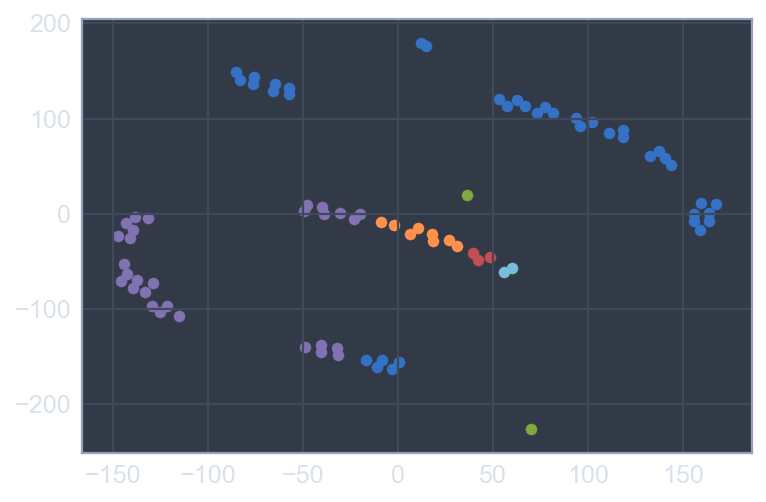

In [29]:
tsne = TSNE(perplexity=5)
embedding_investment = tsne.fit_transform(df_investment.iloc[:, 1:])
TSNE_visualise(embedding_investment, kmeans_investment.labels_,tsne)

### Fixed Essets

In [30]:
kmeans_fixed_essets = KMeans(n_clusters=4).fit(df_fixed_essets.iloc[:, 1:])
series=pd.Series(kmeans_fixed_essets.labels_)
series.value_counts()

2    67
0    11
3     3
1     2
dtype: int64

 5 perplexity & 4 clusters.png


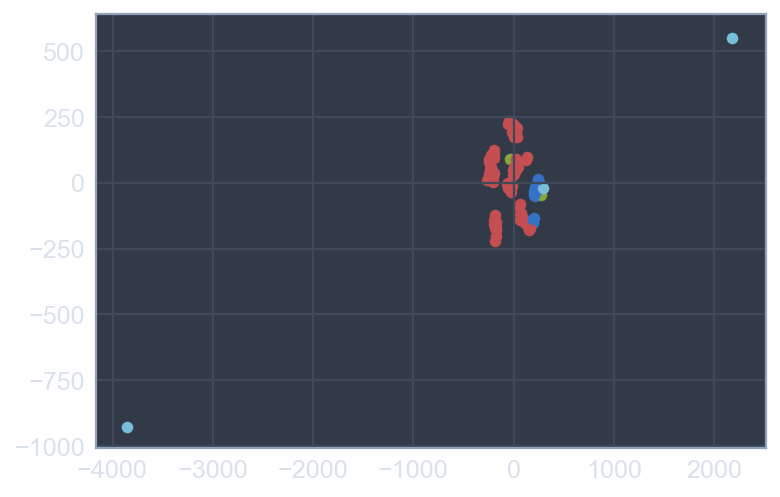

In [31]:
tsne = TSNE(perplexity=5)
embedding_fixed_essets = tsne.fit_transform(df_fixed_essets.iloc[:, 1:])
TSNE_visualise(embedding_fixed_essets, kmeans_fixed_essets.labels_,tsne)

### Trade

In [32]:
kmeans_trade = KMeans(n_clusters=6).fit(df_trade.iloc[:, 1:])
series=pd.Series(kmeans_trade.labels_)
series.value_counts()

1    53
5    15
0     8
4     3
3     3
2     1
dtype: int64

 5 perplexity & 6 clusters.png


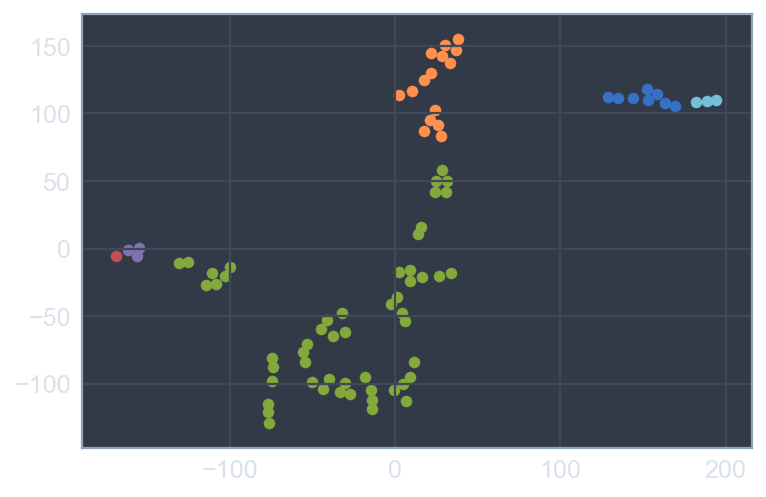

In [33]:
tsne = TSNE(perplexity=5)
embedding_trade = tsne.fit_transform(df_trade.iloc[:, 1:])
TSNE_visualise(embedding_trade, kmeans_trade.labels_,tsne)

### Finance

In [34]:
kmeans_finance = KMeans(n_clusters=6).fit(df_finance.iloc[:, 1:])
series=pd.Series(kmeans_finance.labels_)
series.value_counts()

0    50
4    14
5    12
3     3
2     3
1     1
dtype: int64

 5 perplexity & 6 clusters.png


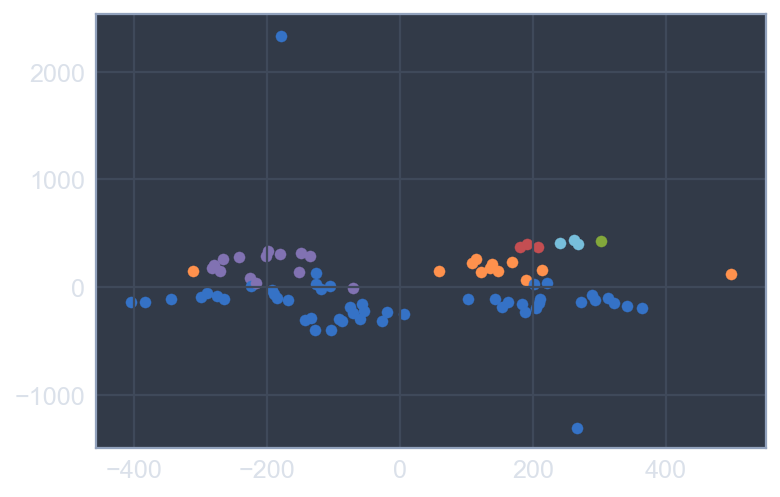

In [35]:
tsne = TSNE(perplexity=5)
embedding_finance = tsne.fit_transform(df_finance.iloc[:, 1:])
TSNE_visualise(embedding_finance, kmeans_finance.labels_,tsne)

### Balance

In [36]:
kmeans_balance = KMeans(n_clusters=8).fit(df_balance.iloc[:, 1:])
series=pd.Series(kmeans_balance.labels_)
series.value_counts()

5    51
0    17
4     6
7     4
1     2
6     1
3     1
2     1
dtype: int64

 5 perplexity & 8 clusters.png


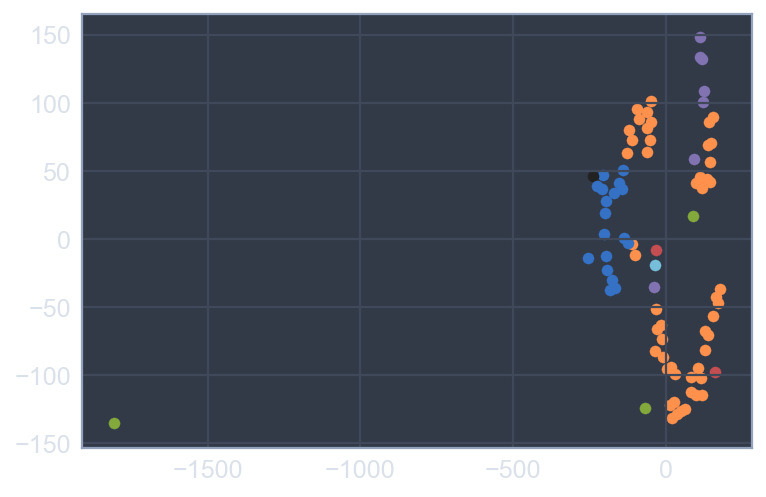

In [37]:
tsne = TSNE(perplexity=5)
embedding_balance = tsne.fit_transform(df_balance.iloc[:, 1:])
TSNE_visualise(embedding_balance, kmeans_balance.labels_,tsne)

### Combined

In [38]:
kmeans_combined = KMeans(n_clusters=7).fit(df_combined.iloc[:, 1:])
series=pd.Series(kmeans_combined.labels_)
series.value_counts()

4    34
0    27
6     9
5     6
3     3
2     2
1     2
dtype: int64

 3 perplexity & 7 clusters.png


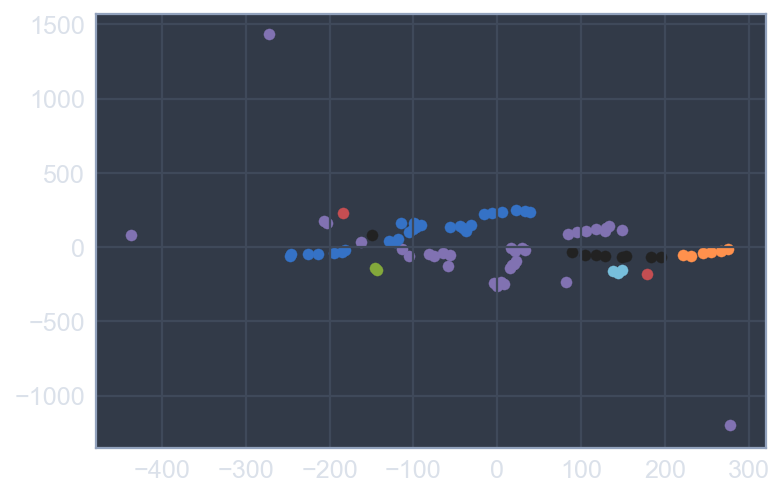

In [39]:
tsne = TSNE(perplexity=3)
embedding_combined = tsne.fit_transform(df_combined.iloc[:, 1:])
TSNE_visualise(embedding_combined, kmeans_combined.labels_,tsne)

### 

In [40]:
for i,j in zip(df_population.index, kmeans_combined.labels_):
    if j == 0:
        print(i, j)

0 0
5 0
7 0
9 0
10 0
12 0
14 0
15 0
16 0
20 0
22 0
30 0
32 0
33 0
35 0
42 0
44 0
48 0
50 0
51 0
53 0
57 0
67 0
73 0
76 0
77 0
81 0


In [41]:
kmeans_labels = [kmeans_population.labels_, kmeans_labor.labels_, kmeans_education.labels_,
                 kmeans_healthcare.labels_, kmeans_grp.labels_, kmeans_grp_by_types.labels_, 
                 kmeans_organizations.labels_, kmeans_ict.labels_, kmeans_connection.labels_,
                 kmeans_science_and_innovations.labels_, kmeans_incomes.labels_, kmeans_investment.labels_, 
                 kmeans_fixed_essets.labels_, kmeans_trade.labels_, kmeans_finance.labels_, kmeans_balance.labels_]

df_labels = pd.DataFrame(np.zeros((83,16)), index=df_population.index)

In [42]:
for i, item in enumerate(kmeans_labels):
    df_labels.iloc[:,i]=item
df_labels.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,0,1,0,0,4,0,0,2,4,3,4,2,5,0,5
1,2,2,0,0,3,4,2,0,5,3,3,0,2,1,4,5
2,1,0,1,2,3,0,0,0,5,2,2,0,2,1,0,5
3,2,0,0,3,0,4,1,0,5,2,3,4,2,1,0,0
4,2,0,3,2,3,4,0,0,0,3,2,0,2,1,0,5


Text(0.5, 1.0, 'Clustering of subjects')

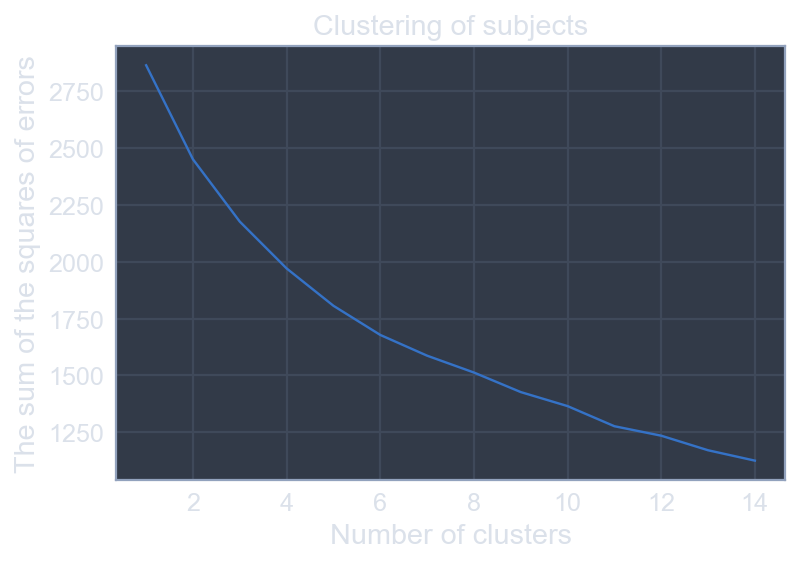

In [43]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_labels)
    df_labels["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("The sum of the squares of errors")
plt.title('Clustering of subjects')

In [44]:
kmeans_clust_labels = KMeans(n_clusters=5).fit(df_labels)
series=pd.Series(kmeans_clust_labels.labels_)
series.value_counts()

3    20
1    19
0    18
4    13
2    13
dtype: int64

 5 perplexity & 5 clusters.png


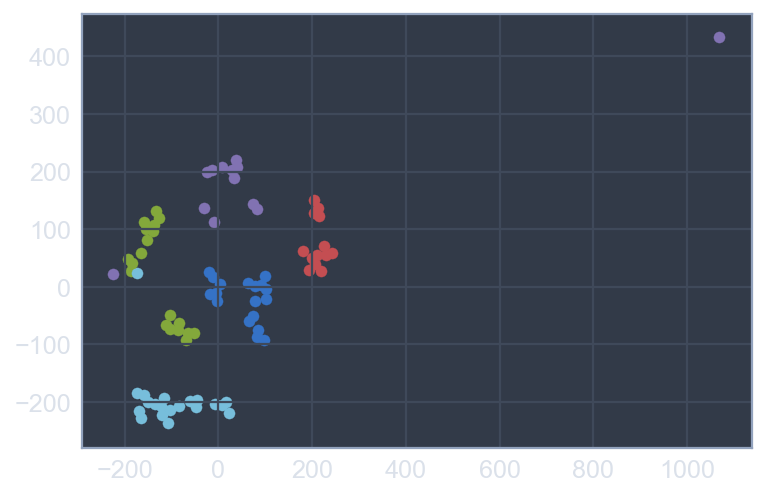

In [45]:
tsne = TSNE(perplexity=5)
embedding_clust_labels = tsne.fit_transform(df_labels)
TSNE_visualise(embedding_clust_labels, kmeans_clust_labels.labels_,tsne)

In [46]:
# Cluster 1
for i, j, k in zip(df_population.index, kmeans_clust_labels.labels_, df_population.Region):
    if j == 0:
        print(k)

Belgorod region
Kaluga region
Tula region
Komi Republic
Arkhangelsk region
Vologodskaya Oblast
Leningrad region
Murmansk region
The Republic of Dagestan
Republic of Tatarstan
Orenburg region
Samara Region
Khanty-Mansiysk Autonomous Okrug-Ugra
Tyumen region
The Republic of Buryatia
Krasnoyarsk region
Kamchatka Krai
Khabarovsk region


In [47]:
# Cluster 2
for i, j, k in zip(df_population.index, kmeans_clust_labels.labels_, df_population.Region):
    if j == 1:
        print(k)

Vladimir region
Kostroma region
Oryol Region
Ryazan Oblast
Yaroslavskaya oblast
Novgorod region
Rostov region
Republic of Bashkortostan
Perm region
Kirov region
Nizhny Novgorod Region
Penza region
Saratov region
Ulyanovsk region
Sverdlovsk region
Chelyabinsk region
Irkutsk region
Kemerovo region
Tomsk region


In [48]:
# Cluster 3
for i, j, k in zip(df_population.index, kmeans_clust_labels.labels_, df_population.Region):
    if j == 2:
        print(k)

Ivanovo region
Republic of Karelia
Republic of Adygea
Mari El Republic
The Republic of Mordovia
Udmurtia
Chuvash Republic
Kurgan region
The Republic of Khakassia
Novosibirsk region
Omsk region
The Republic of Sakha (Yakutia)
Primorsky Krai


In [49]:
# Cluster 4
for i, j, k in zip(df_population.index, kmeans_clust_labels.labels_, df_population.Region):
    if j == 3:
        print(k)

Bryansk region
Lipetsk region
Smolensk region
Tver region
Nenets Autonomous Okrug
Pskov region
Republic of Kalmykia
Astrakhan region
The Republic of Ingushetia
Kabardino-Balkaria
Karachay-Cherkess Republic
Republic of North Ossetia - Alania
Chechen Republic
Stavropol region
Altai Republic
Tyva Republic
Altai region
Transbaikal region
Magadan Region
Jewish Autonomous Region


In [50]:
# Cluster 5
for i, j, k in zip(df_population.index, kmeans_clust_labels.labels_, df_population.Region):
    if j == 4:
        print(k)

Voronezh region
Kursk region
Moscow region
Tambov Region
Kaliningrad region
Republic of Crimea
Krasnodar region
Volgograd region
Sevastopol
Yamalo-Nenets Autonomous District
Amur region
Sakhalin region
Chukotka Autonomous Region


### Russia by socio-economic clusters

![Russia by socio-economic clusters](https://raw.githubusercontent.com/art-petrosov/Clustering_Russian_Regions/master/Russia_by_5_clusters.png)